In [28]:
# Cell 1: Create sample new dogs CSV in the correct folder if it doesn't exist
import pandas as pd
import os
import joblib

rf_pipeline = joblib.load("../models/rf_harness_model.pkl")
data_path = "data/new_dogs.csv"

# Check if file exists, if not, create it
if not os.path.exists(data_path):
    sample_data = pd.DataFrame({
        "breed": ["labrador", "poodle", "beagle"],
        "weight": [30, 10, 15],
        "chest": [60, 40, 45],
        "neck": [35, 25, 30],
        "boot_size": [5, 3, 4],
        "age": [3, 2, 4],
        "activity": ["high", "medium", "low"]
    })
    os.makedirs("data", exist_ok=True)
    sample_data.to_csv(data_path, index=False)
    print("Sample new_dogs.csv created!")

# Load the new dog data
new_dog_data = pd.read_csv(data_path)
new_dog_data.head()


,breed,weight,chest,neck,boot_size,age,activity
0,labrador,30,60,35,5,3,high
1,poodle,10,40,25,3,2,medium
2,beagle,15,45,30,4,4,low


In [29]:
# Ensure column names match training data
new_dog_data.rename(columns={'boot_size': 'bootsize'}, inplace=True)

# Now predict
X_new = new_dog_data.copy()
predicted_sizes = rf_pipeline.predict(X_new)
new_dog_data['predicted_harness_size'] = predicted_sizes
new_dog_data


,breed,weight,chest,neck,bootsize,age,activity,predicted_harness_size
0,labrador,30,60,35,5,3,high,M
1,poodle,10,40,25,3,2,medium,S
2,beagle,15,45,30,4,4,low,S


/tmp/ipykernel_130228/1851091775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_harness_size', data=new_dog_data, palette='pastel')


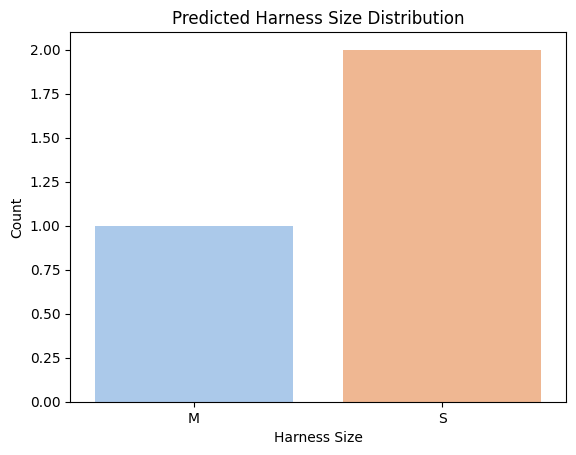

Predictions saved to new_dogs_predictions.csv


In [30]:
# Cell 3: Visualize predicted harness sizes
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='predicted_harness_size', data=new_dog_data, palette='pastel')
plt.title('Predicted Harness Size Distribution')
plt.xlabel('Harness Size')
plt.ylabel('Count')
plt.show()

# Optionally, save predictions to CSV
new_dog_data.to_csv("../data/new_dogs_predictions.csv", index=False)
print("Predictions saved to new_dogs_predictions.csv")


predicted_harness_size
S    2
M    1
Name: count, dtype: int64


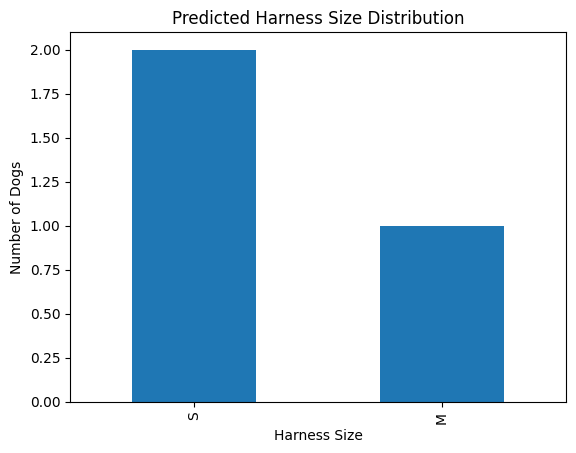

In [31]:
# Count how many dogs fall into each harness size
size_counts = new_dog_data['predicted_harness_size'].value_counts()
print(size_counts)

# Simple bar plot
import matplotlib.pyplot as plt

size_counts.plot(kind='bar', title='Predicted Harness Size Distribution')
plt.xlabel('Harness Size')
plt.ylabel('Number of Dogs')
plt.show()
